## LangGraph



In [2]:
!pip install --upgrade pip
!pip install -q langchain_community
!pip install -q langchain-ollama
!pip install -q langgraph langsmith 
!pip install -q tavily-python

!pip install -q streamlit-chat
!pip install -q faiss-cpu
!pip install -q langgraph


  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2


In [3]:
# 환경 변수 
from dotenv import load_dotenv
load_dotenv(override=True)


from langchain_community.retrievers import TavilySearchAPIRetriever
from langchain_community.tools.tavily_search import TavilySearchResults

import os
import random
def get_tavily_api_key() -> str:
    random_number = random.randint(1, 7)
    # random_number = 7
    print(f"--> TAVILY_API_KEY_{random_number}")
    return os.getenv(f"TAVILY_API_KEY_{random_number}")

def get_tavily_retriever() -> TavilySearchAPIRetriever:
    os.environ["TAVILY_API_KEY"] = get_tavily_api_key()    
    return TavilySearchAPIRetriever(k=2, api_key=get_tavily_api_key())

def get_tavily_search_results() -> TavilySearchResults:    
    os.environ["TAVILY_API_KEY"] = get_tavily_api_key()
    return TavilySearchResults(max_results=2)



# result = get_tavily_search_results().invoke({'query':"What is LangChain?"})
# print(result)


In [4]:
from ollama import list
from ollama import ListResponse

response: ListResponse = list()

for model in response.models:
  print('Name:', model.model)

Name: llama3.2-vision:latest
Name: EEVE-Korean-Q5_K_M:latest
Name: llama3.2:latest


In [8]:
## test add_messages

from langchain_core.messages import AIMessage, HumanMessage
from langgraph.graph import add_messages

# 기본 사용 예시
msgs1 = [HumanMessage(content="안녕하세요?", id="1")]
msgs2 = [AIMessage(content="반갑습니다~", id="2")]
msgs3 = [HumanMessage(content="안녕하222세요?", id="1")]
result1 = add_messages(msgs1, msgs2)
result2 = add_messages(result1, msgs3)
print(result2)

🕒 현재 시간: 2024-12-09 11:52:30
[HumanMessage(content='안녕하222세요?', additional_kwargs={}, response_metadata={}, id='1'), AIMessage(content='반갑습니다~', additional_kwargs={}, response_metadata={}, id='2')]
⏳ 실행 시간: 0.03초


In [28]:
from langchain_ollama.llms import OllamaLLM
from langchain_ollama.chat_models import ChatOllama

model_name = "llama3.2"
# llm = OllamaLLM(model=model_name)
llm = ChatOllama(model=model_name, temperature=0)


In [11]:
from langchain_core.prompts import ChatPromptTemplate


template = """Question: {question}

Answer: Let's think step by step."""

prompt = ChatPromptTemplate.from_template(template)


chain = prompt | llm


🕒 현재 시간: 2024-12-09 11:53:16
⏳ 실행 시간: 0.00초


In [12]:
chain.invoke({"question": "What is LangChain?"})

🕒 현재 시간: 2024-12-09 11:53:18


AIMessage(content="LangChain is an open-source project that aims to simplify interoperability between blockchain networks and traditional software applications. Here's a breakdown of what it does:\n\n1. **Layering**: LangChain introduces the concept of layering, where blockchain-specific functionality is integrated into existing software layers, making it easier for developers to incorporate blockchain capabilities into their projects.\n\n2. **Web3 Integration**: It provides an interface for interacting with Web3 applications (e.g., Ethers.js), allowing developers to access and manipulate blockchain data, perform transactions, and more within the context of their existing applications.\n\n3. **Decentralized Data Storage**: LangChain enables decentralized storage solutions like IPFS (InterPlanetary File System) or Swarm, which can be used for storing and retrieving data in a secure and decentralized manner.\n\n4. **Blockchain Network Agnostic**: It allows developers to easily switch bet

⏳ 실행 시간: 9.26초


In [11]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage("answer is korean", id="1"),
    HumanMessage("현재 시간은!", id="2"),
]
print(f"--> messages : {messages}")
print(f"--> messages type : {type(messages)}")
response = chain.invoke(messages)



🕒 현재 시간: 2024-12-09 10:58:44
--> messages : [SystemMessage(content='answer is korean', additional_kwargs={}, response_metadata={}, id='1'), HumanMessage(content='현재 시간은!', additional_kwargs={}, response_metadata={}, id='2')]
--> messages type : <class 'list'>
⏳ 실행 시간: 2.41초


In [41]:
print(response)

🕒 현재 시간: 2024-11-28 15:09:35
Step 1: Understand the context of the question.
The given text appears to be a list of message objects, which consists of two messages - one labeled "SystemMessage" and another labeled "HumanMessage." These messages are meant for processing by an AI assistant like myself.

Step 2: Analyze the content of each message.
- SystemMessage(content='answer is korrea', additional_kwargs={}, response_metadata={}, id='1'): This message has the content "answer is korrea" and no additional keywords or response metadata. We can assume that it's a question, but it may have some spelling mistakes.
- HumanMessage(content='현재 시간은!' additional_kwargs={}, response_metadata={}, id='2'): This message simply states, "현재 시간은!" which translates to "What time is it now?" in English. It seems like a request for the current time.

Step 3: Combine both messages for clarity and provide an answer.
Since the first message appears to be a question but has spelling mistakes, we can assume t

In [13]:
from typing import Annotated, Any, List

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class TestState(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[List[Any], add_messages]
        #  messages: list



🕒 현재 시간: 2024-12-09 11:53:39
⏳ 실행 시간: 0.00초


In [49]:
from langchain_core.messages import HumanMessage, SystemMessage



def chatbot(state: TestState) -> TestState:
    # print(f"--> chatbot : start state: {state}")
    print(f"--> chatbot messages : {type(state['messages'])}")
    print(f"--> chatbotmessages : {state['messages']}")
    tools = [get_tavily_search_results()]
    llm_with_tools = llm.bind_tools(tools)
    # response = llm_with_tools.invoke(state['messages'])

    # print(f"--> chatbot : after chain.invoke : {response}")
    # # Create an AIMessage instead of returning raw response
    # from langchain_core.messages import AIMessage
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

🕒 현재 시간: 2024-12-09 13:24:57
⏳ 실행 시간: 0.00초


In [22]:
import json
from langchain_core.messages import HumanMessage, SystemMessage, ToolMessage
from langchain_core.tools import BaseTool


class BasicToolNode:
    """A Node that runs requested in the last AI message"""

    def __init__(self, tools: List[BaseTool]):
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs:dict):
        if messages := inputs.get("messages", []):
            messages = messages[-1]
        else:
            raise ValueError("No messages found in inputs")
        
        output = []
        for tool_call in messages.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
                )
            output.append(ToolMessage(
                content=json.dumps(tool_result),
                name=tool_call["name"],
                tool_call_id=tool_call["id"],
                )
            )
        return {"messages": output}
    
tool_node = BasicToolNode([get_tavily_search_results()])

        

🕒 현재 시간: 2024-12-09 12:00:07
⏳ 실행 시간: 0.00초


In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage

def search_wikipedia(state: TestState) -> TestState:
    # print(f"--> chatbot : start state: {state}")
    print(f"--> messages : {type(state['messages'])}")
    print(f"--> messages : {state['messages']}")

    response = chain.invoke(state['messages'])

    print(f"--> chatbot : after chain.invoke : {response}")
    # Create an AIMessage instead of returning raw response
    from langchain_core.messages import AIMessage
    return {"messages": [AIMessage(content=str(response))]}

🕒 현재 시간: 2024-12-09 13:46:59


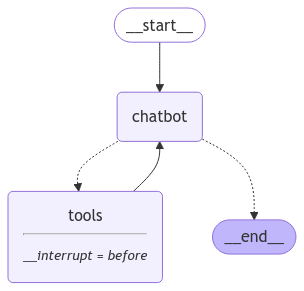

⏳ 실행 시간: 1.12초


In [54]:

try:
    del graph_builder
except NameError:
    pass

def route_tools(state: TestState):
    if isinstance(state, List):
        ai_message = state[-1]
    elif messages := state.get("messages"):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in state: {state}")
    
    print(f"--> ai_message : {ai_message}")

    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    
    return END
    
graph_builder = StateGraph(TestState)

# query -> retrieve_document -> eval document  response
graph_builder.set_entry_point("chatbot")
# graph_builder.set_finish_point("chatbot")

graph_builder.add_node("tools", tool_node)
graph_builder.add_node("chatbot", chatbot)

from langgraph.prebuilt import tools_condition
# graph_builder.add_conditional_edges("chatbot", route_tools, {"tools": "tools", END: END})
graph_builder.add_conditional_edges("chatbot", tools_condition)
graph_builder.add_edge("tools", "chatbot")


from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

graph = graph_builder.compile(
    checkpointer=memory
    , interrupt_before=["tools"]
)

from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass


In [63]:

config = {"configurable": {"thread_id": "test1"}}

# stream_graph_updates 함수는 사용자의 입력을 받아 그래프를 통해 응답을 스트리밍하는 함수입니다
def stream_graph_updates(user_input: str):
    events = graph.stream(
        {"messages": [("user", user_input)]}, config, stream_mode="values"
    )
    for event in events:
        event["messages"][-1].pretty_print()


# 메인 대화 루프입니다
while True:
        # 사용자로부터 입력을 받습니다
        user_input = input("User: ")
        
        # 종료 명령어를 확인합니다 (quit, exit, q)
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        # 사용자 입력을 처리하여 응답을 생성합니다
        stream_graph_updates(user_input)
   

🕒 현재 시간: 2024-12-09 13:57:40
================================ Human Message =================================

what time is it now
--> chatbot messages : <class 'list'>
--> chatbotmessages : [HumanMessage(content='where?', additional_kwargs={}, response_metadata={}, id='602a1a28-19e5-4280-9364-8be63d222429'), AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2024-12-09T04:47:38.948681777Z', 'done': True, 'done_reason': 'stop', 'total_duration': 5116103347, 'load_duration': 4525813865, 'prompt_eval_count': 188, 'prompt_eval_duration': 330000000, 'eval_count': 21, 'eval_duration': 259000000, 'message': {'role': 'assistant', 'content': '', 'images': None, 'tool_calls': [{'function': {'name': 'tavily_search_results_json', 'arguments': {'query': 'where'}}}]}}, id='run-c293fa14-c783-4a7e-b6fa-5b8449e89cf1-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'where'}, 'id': 'cf9a2c38-81a8-4a0a-8eeb-53f490e34651', 'type': 'to

In [ ]:

# stream_graph_updates 함수는 사용자의 입력을 받아 그래프를 통해 응답을 스트리밍하는 함수입니다
def stream_graph_updates(user_input: str):
    # graph.stream()을 사용하여 사용자 입력을 그래프에 전달하고 응답을 스트리밍합니다
    # {"messages": [("user", user_input)]} 형태로 입력을 포맷팅합니다
    for event in graph.stream({"messages": [("user", user_input)]}):
        # 각 이벤트에서 값을 추출하여 출력합니다
        for value in event.values():
            # Assistant: 프리픽스와 함께 메시지의 마지막 컨텐츠를 출력합니다
            print("Assistant:", value["messages"][-1].content)




# 사용자 입력을 처리하여 응답을 생성합니다
stream_graph_updates("너는 누구야?")
  

In [60]:
snapshot = graph.get_state(config)
snapshot.next

existing_message = snapshot.values["messages"][-1]
print(existing_message.tool_calls)

# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = graph.stream(None, config, stream_mode="values")
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

🕒 현재 시간: 2024-12-09 13:53:08
[]
================================== Ai Message ==================================

The word "where" is an adverb that can be used in various ways, such as asking about a place or location (Where are you?), indicating those things (I told him where I was), and as a conjunction. It can also be used as a noun to refer to a person or place.

Some common synonyms for the word "where" include "whence", "whereabouts", and "hither".

The word "where" has a rich history, dating back to Middle English, and its meaning has evolved over time. In modern usage, it is commonly used in phrases such as "right down to it" or "when you come (right) down to it".
⏳ 실행 시간: 0.00초


In [66]:
print(config)
snapshot = graph.get_state(config)
existing_message = snapshot.values["messages"][-1]
existing_message.pretty_print()

from langchain_core.messages import AIMessage, ToolMessage

answer = (
    "LangGraph is a library for building stateful, multi-actor applications with LLMs."
)
new_messages = [
    # The LLM API expects some ToolMessage to match its tool call. We'll satisfy that here.
    ToolMessage(content=answer, tool_call_id=existing_message.tool_calls[0]["id"]),
    # And then directly "put words in the LLM's mouth" by populating its response.
    AIMessage(content=answer),
]

new_messages[-1].pretty_print()
graph.update_state(
    # Which state to update
    config,
    # The updated values to provide. The messages in our `State` are "append-only", meaning this will be appended
    # to the existing state. We will review how to update existing messages in the next section!
    {"messages": new_messages},
)

print("\n\nLast 2 messages;")
print(graph.get_state(config).values["messages"][-2:])

🕒 현재 시간: 2024-12-09 13:59:44
{'configurable': {'thread_id': 'test1'}}
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (63bbb5f8-c994-472e-b97f-e4028997ee33)
 Call ID: 63bbb5f8-c994-472e-b97f-e4028997ee33
  Args:
    query: current time
================================== Ai Message ==================================

LangGraph is a library for building stateful, multi-actor applications with LLMs.


Last 2 messages;
[ToolMessage(content='LangGraph is a library for building stateful, multi-actor applications with LLMs.', id='8961f990-3d44-43de-a006-3c65df908a63', tool_call_id='63bbb5f8-c994-472e-b97f-e4028997ee33'), AIMessage(content='LangGraph is a library for building stateful, multi-actor applications with LLMs.', additional_kwargs={}, response_metadata={}, id='49f8aec7-209a-446a-a45f-06e57340600c')]
⏳ 실행 시간: 0.00초


In [35]:
from langchain_core.runnables import RunnableConfig

config = RunnableConfig(recursion_limit=10)

inputs = State(messages="현재 시간은?")
outputs = graph.invoke(inputs, config)

print(outputs)

🕒 현재 시간: 2024-11-28 15:05:20
--> messages : <class 'list'>
--> messages : [HumanMessage(content='현재 시간은?', additional_kwargs={}, response_metadata={}, id='da3b46ed-a651-45d4-a1e2-d64841f2bc5e')]
--> chatbot : after llm.invoke : 현재 시간은 다음과 같습니다: [날짜, 시간 포맷팅 규칙에 따라 현재 날짜와 시간을 표시합니다]
{'messages': [HumanMessage(content='현재 시간은?', additional_kwargs={}, response_metadata={}, id='da3b46ed-a651-45d4-a1e2-d64841f2bc5e'), AIMessage(content='현재 시간은 다음과 같습니다: [날짜, 시간 포맷팅 규칙에 따라 현재 날짜와 시간을 표시합니다]', additional_kwargs={}, response_metadata={}, id='f7ff2f24-6e70-4b00-abeb-e76ee07443f0')]}
⏳ 실행 시간: 15.82초


In [ ]:
!pip install -q "langgraph-cli[inmem]" python-dotenv
!rm -rf langgraph-server
!langgraph new langgraph-server --template react-agent-python
!cp ../.env langgraph-server/.env
!cd langgraph-server && pip install -q -e . && langgraph dev


model='llama3.2' temperature=0.0


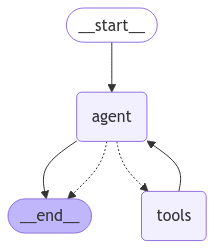

In [31]:
from typing import Annotated, Any, List, Literal
from typing_extensions import TypedDict

from langchain_core.messages import AIMessage
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode


@tool
def get_weather(location: str):
    """Call to get the weather"""
    if location.lower() in ["seoul", "inchen"]:
        return "It's 20 degrees and foggy."
    else :
        return "It's 100 degrees and sunny."
    
@tool
def get_coolest_cities():
    """Get a list of coolest cities"""
    return "seoul, inchen"

tools = [get_coolest_cities, get_weather]
tool_node = ToolNode(tools=tools)

print(llm)
model_with_tools = llm.bind_tools(tools)


from langgraph.graph import StateGraph, END, START
from langgraph.graph.message import add_messages
import operator
from langchain.chains import ConversationalRetrievalChain


class State(TypedDict):
    messages: Annotated[List[Any], add_messages]
    
def chatboat(state: State):
    return {
        "messages" : [llm.invoke(state["messages"])]
        }

def file_uploader(state: State) -> Literal["chatboat"]:
    

def should_continue(state: State) -> Literal["tools", END]:
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tools"
    return END

def call_model(state: State):
    messages = state["messages"]
    response = model_with_tools.invoke(messages)
    return {"messages": [response]}

graph_builder = StateGraph(State)

graph_builder.add_node("agent", call_model)
graph_builder.add_node("tools", tool_node)

graph_builder.set_entry_point("agent")
graph_builder.set_finish_point("agent")

graph_builder.add_conditional_edges("agent", should_continue)
graph_builder.add_edge("tools", "agent")

graph = graph_builder.compile()

from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [30]:
model_with_tools.invoke("What's the weather like in Seoul?").tool_calls
tool_node.invoke({"messages": [model_with_tools.invoke("What's the weather like in Seoul?")]})

{'messages': [ToolMessage(content="It's 20 degrees and foggy.", name='get_weather', tool_call_id='0f4b7edc-a1ea-4119-9776-e2f2c8d91038')]}

In [33]:
while True:
    user_input = input("User : ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("goobye!")
        break
    
    for event in graph.stream({"messages" : ("user", user_input)}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

Assistant: 
Assistant: It's 20 degrees and foggy.
Assistant: The current weather in Seoul is 20 degrees Celsius with a thick layer of fog.
goobye!


In [32]:
graph.invoke("What's the weather like in Seoul?")

InvalidUpdateError: Expected dict, got What's the weather like in Seoul?
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE